# problem statement

### A retail company shared purchase summary for certain products from last month. also has customer demographics
### goal: to build model to perdict purchase amt against variaus products (for personalzised offer)

In [1]:
# load the data to have a basic understanding

In [4]:
# read the file
import numpy as numpy
import pandas as pd

In [5]:
data = pd.read_csv('data.csv')
#d

In [6]:
# rows and cols check
data.shape

(550068, 12)

In [7]:
# check the index details
data.index

RangeIndex(start=0, stop=550068, step=1)

In [8]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [10]:
# show first 3 records
data.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [11]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [12]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [13]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [14]:
# check for duplicate records
data.duplicated().sum()

0

In [15]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
550063    False
550064    False
550065    False
550066    False
550067    False
Length: 550068, dtype: bool

In [ ]:
# NO duplicate values
# 0.5M~ rows and 12 columns

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [17]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [18]:
data['Gender'].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

<Axes: ylabel='count'>

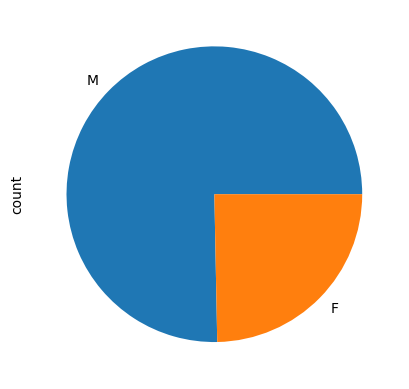

In [20]:
data['Gender'].value_counts().plot.pie()

<Axes: ylabel='count'>

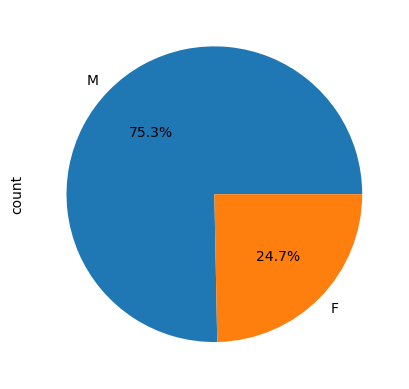

In [22]:
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%')

In [ ]:
Gender : the purchase is made mostly by male(75%) compared to female(25%)

<Axes: xlabel='Age', ylabel='count'>

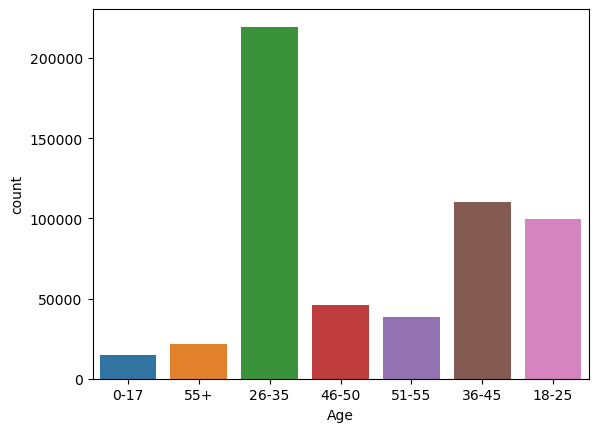

In [25]:
sns.countplot(x='Age', data= data)

In [ ]:
Age: Maximum buyers belong to age grp "26-35" and lease is "0-17" age grp
There may be are products which are not allowed to be sold to "underage"    

In [26]:
data['Age'].value_counts(normalize=True)*100

Age
26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: proportion, dtype: float64

In [27]:
data['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [28]:
data['Age'].value_counts(normalize=True)

Age
26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

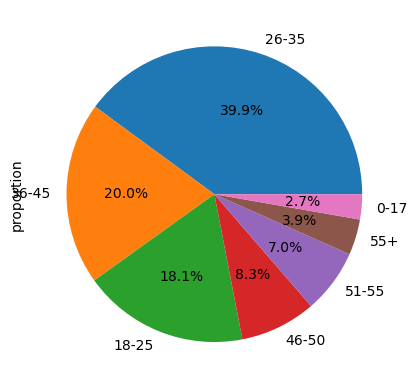

In [30]:
data['Age'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

<Axes: ylabel='proportion'>

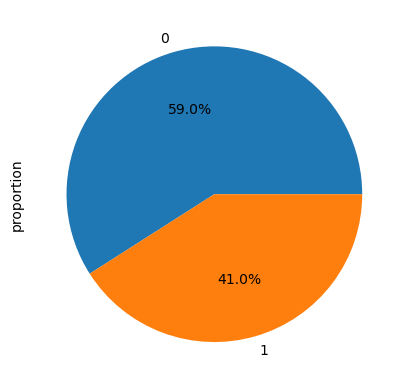

In [39]:
data['Marital_Status'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

In [ ]:
Marital Status: Unmarried are buying more products than married people

In [38]:
data['Marital_Status'].value_counts(normalize=True)*100

Marital_Status
0    59.034701
1    40.965299
Name: proportion, dtype: float64

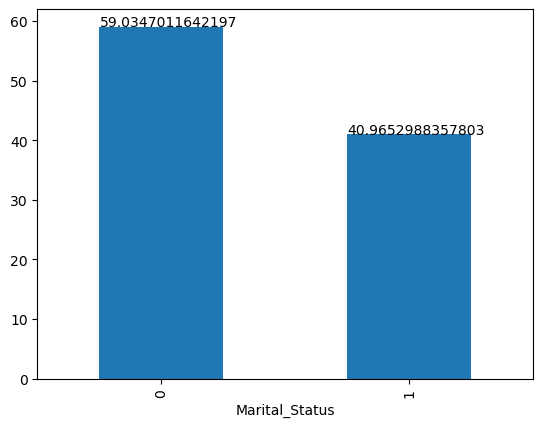

In [37]:
ax = (data['Marital_Status'].value_counts(normalize=True)*100).plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.0005, p.get_height() * 1.0005))
    

In [40]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

<Axes: xlabel='Product_Category_1', ylabel='count'>

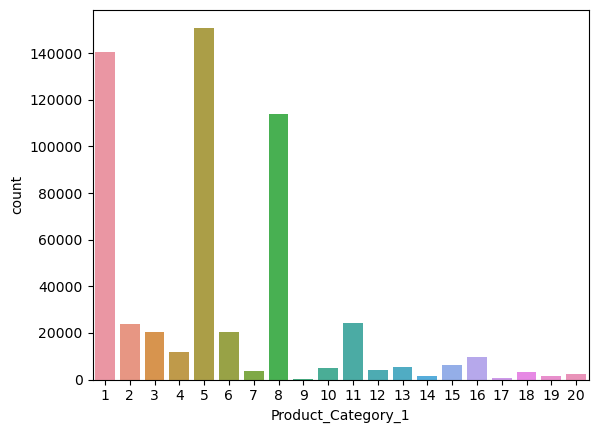

In [41]:
sns.countplot(x='Product_Category_1', data=data)

<Axes: xlabel='Product_Category_1', ylabel='count'>

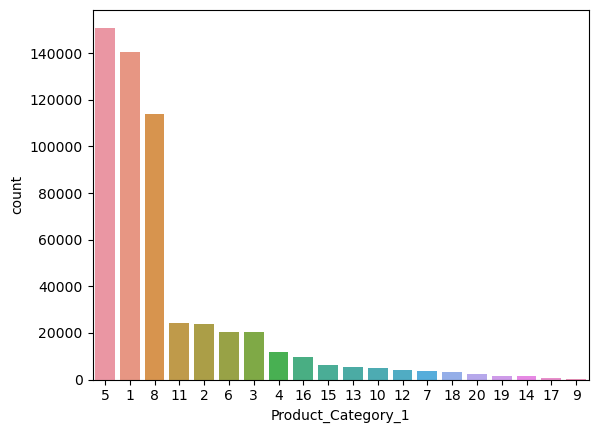

In [43]:
sns.countplot(x='Product_Category_1', data=data, order=data['Product_Category_1'].value_counts().index)

In [ ]:
Product_Category_1 : Top-3: product-5,1,8,  Least:9,17.14

In [44]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
independent varaiable = other than target
dependent/target variable = purchase

<Axes: >

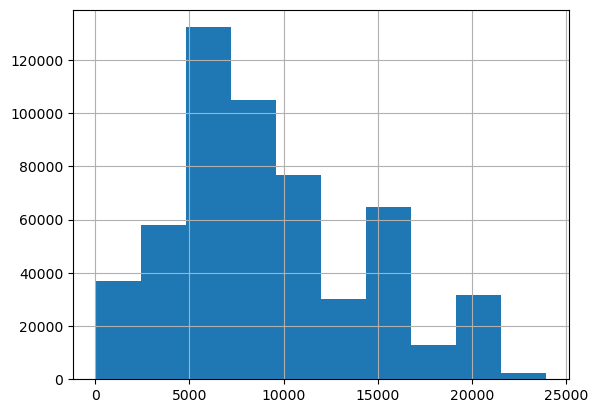

In [46]:
data['Purchase'].hist()

In [ ]:
purchase: 
    max purchase from 5k-9k around more than 1-lakh purchases
    b/w 22k-25k amount there are least purchases
    

In [ ]:
# bi-variable

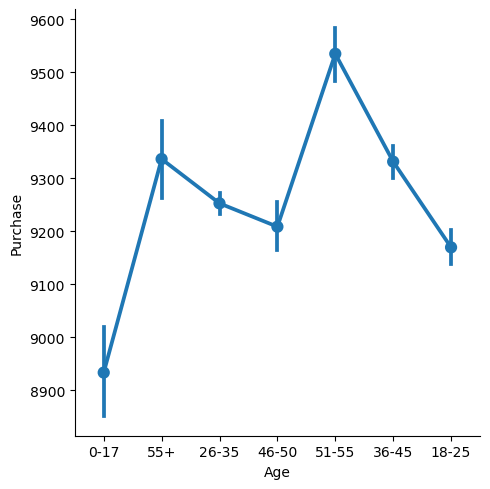

In [78]:
sns.catplot(x='Age', y = 'Purchase', data=data, kind='point')

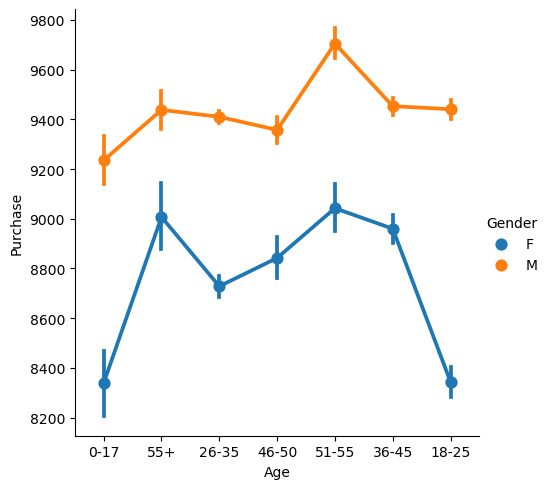

In [49]:
sns.catplot(x='Age', y = 'Purchase', data=data, kind='point', hue='Gender')

In [51]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [52]:
data['City_Category']

0         A
1         A
2         A
3         A
4         C
         ..
550063    B
550064    C
550065    B
550066    C
550067    B
Name: City_Category, Length: 550068, dtype: object

In [53]:
data['City_Category'].nunique()

3

In [54]:
data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

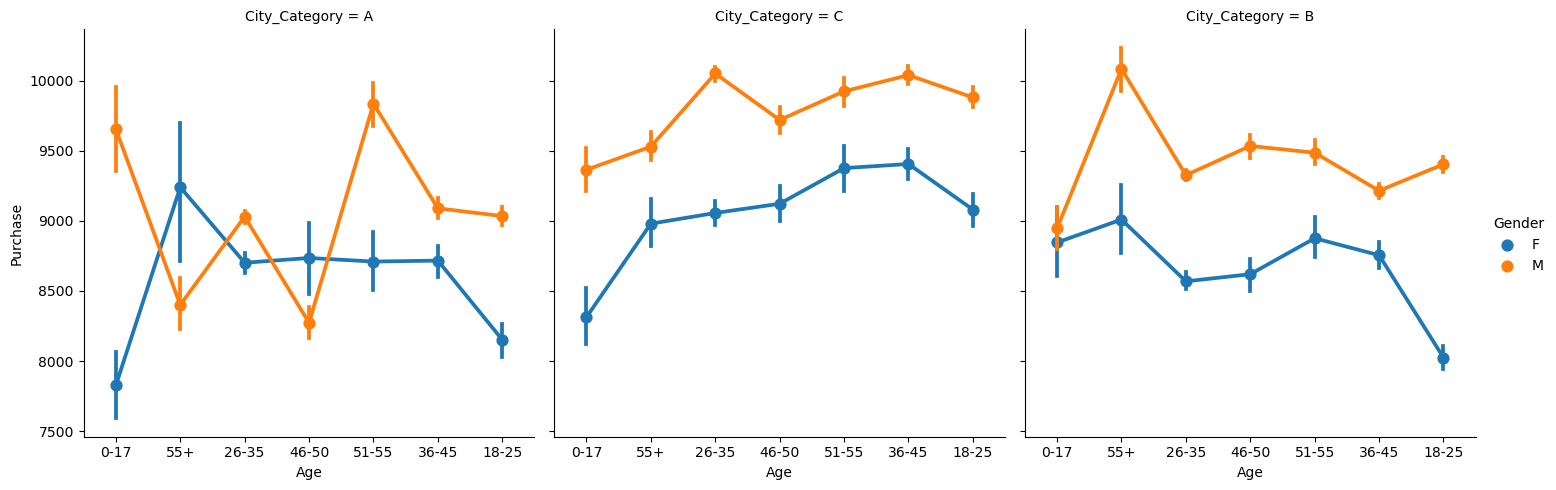

In [55]:
sns.catplot(x='Age', y = 'Purchase', data=data, kind='point', hue='Gender', col='City_Category')

In [56]:
data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [58]:
data['City_Category'].nunique()

3

In [61]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [62]:
data['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [71]:
#unique values of cols that <25 unique values
for i in data.columns:
    if data[i].nunique() < 25:
        print(data[i].unique())

['F' 'M']
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
['A' 'C' 'B']
['2' '4+' '3' '1' '0']
[0 1]
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
[nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [75]:
for i in data.columns:
    if data[i].nunique() < 25:
        print(i, '(',data[i].nunique(), ')--> ', data[i].unique(), '\n')

Gender ( 2 )-->  ['F' 'M'] 

Age ( 7 )-->  ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25'] 

Occupation ( 21 )-->  [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6] 

City_Category ( 3 )-->  ['A' 'C' 'B'] 

Stay_In_Current_City_Years ( 5 )-->  ['2' '4+' '3' '1' '0'] 

Marital_Status ( 2 )-->  [0 1] 

Product_Category_1 ( 20 )-->  [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19] 

Product_Category_2 ( 17 )-->  [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.] 

Product_Category_3 ( 15 )-->  [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.] 



In [76]:
[print(i, '(',data[i].nunique(), ')--> ', data[i].unique(), '\n') if data[i].nunique() < 25 else None for i in data.columns]

Gender ( 2 )-->  ['F' 'M'] 

Age ( 7 )-->  ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25'] 

Occupation ( 21 )-->  [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6] 

City_Category ( 3 )-->  ['A' 'C' 'B'] 

Stay_In_Current_City_Years ( 5 )-->  ['2' '4+' '3' '1' '0'] 

Marital_Status ( 2 )-->  [0 1] 

Product_Category_1 ( 20 )-->  [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19] 

Product_Category_2 ( 17 )-->  [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.] 

Product_Category_3 ( 15 )-->  [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.] 



[None, None, None, None, None, None, None, None, None, None, None, None]

# using pipeline

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [80]:
data.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370


In [81]:
target_col = ['Purchase']
ignore_cols = ['User_ID','Product_ID']

In [82]:
cat_cols = data.drop(columns = ['User_ID','Product_ID','Purchase']).select_dtypes('object').columns
print(cat_cols)

Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')


In [84]:
cat_cols = data.drop(columns = ignore_cols+target_col).select_dtypes('object').columns
print(cat_cols)

Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')


In [85]:
num_cols = data.drop(columns = ignore_cols+target_col).select_dtypes(['int','float']).columns
print(num_cols)

Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')


In [ ]:
#check null values

In [86]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [87]:
data.isna().sum().values/data.shape[0]*100

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 31.56664267,
       69.67265865,  0.        ])

In [89]:
data[['Product_Category_2','Product_Category_3']].isna().sum().values/data.shape[0]*100

array([31.56664267, 69.67265865])

In [90]:
# necessary liraries 
from sklearn.preprocessing import OneHotEncoder # encoding
from sklearn.preprocessing import MinMaxScaler # scaling
from sklearn.impute import SimpleImputer # imputation

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [98]:
# Define the pipeline

# for category columns do 1.OHE
cat_encode = Pipeline(steps=[
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

# for number columns do 1.impute, 2.scaling
num_encode = Pipeline(steps=[
    ('simp',SimpleImputer(strategy='most_frequent')),
    ('scale',MinMaxScaler())
])

In [99]:
# map which pipeline to work on what column types

full_encode = ColumnTransformer(transformers=[
    ('cat_prep',cat_encode,cat_cols),
    ('num_prep',num_encode,num_cols)
])

In [100]:
pipe = Pipeline([
    ('preprocess',full_encode)
])

In [101]:
pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_prep',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')),
                                                 ('num_prep',
                                                  Pipeline(steps=[('simp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object'))]))])

In [102]:
pipe.fit(data.drop(columns=ignore_cols+target_col))

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_prep',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')),
                                                 ('num_prep',
                                                  Pipeline(steps=[('simp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object'))]))])

In [103]:
data.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370


In [104]:
in_new_data = data.drop(columns=ignore_cols+target_col).head(1)
in_new_data

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,F,0-17,10,A,2,0,3,NaN,NaN


In [105]:
out_new_data = pipe.transform(in_new_data)
out_new_data= pd.DataFrame(out_new_data)
out_new_data

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.5,0.0,0.105263,0.375,0.866667


In [108]:
pipe_new_cat_cols = pipe['preprocess'].transformers_[0][1][0].get_feature_names_out(cat_cols)
pipe_new_cat_cols

array(['Gender_F', 'Gender_M', 'Age_0-17', 'Age_18-25', 'Age_26-35',
       'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+',
       'City_Category_A', 'City_Category_B', 'City_Category_C',
       'Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4+'], dtype=object)

In [117]:
import numpy as np

ndcols = np.append(pipe_new_cat_cols,num_cols)
print(ndcols)

['Gender_F' 'Gender_M' 'Age_0-17' 'Age_18-25' 'Age_26-35' 'Age_36-45'
 'Age_46-50' 'Age_51-55' 'Age_55+' 'City_Category_A' 'City_Category_B'
 'City_Category_C' 'Stay_In_Current_City_Years_0'
 'Stay_In_Current_City_Years_1' 'Stay_In_Current_City_Years_2'
 'Stay_In_Current_City_Years_3' 'Stay_In_Current_City_Years_4+'
 'Occupation' 'Marital_Status' 'Product_Category_1' 'Product_Category_2'
 'Product_Category_3']


In [118]:
len(ndcols)

22

In [119]:
out_new_data.columns = ndcols
out_new_data

,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,...,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.5,0.0,0.105263,0.375,0.866667


In [120]:
in_new_data

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,F,0-17,10,A,2,0,3,NaN,NaN


In [107]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [128]:
data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [151]:
data[(data['User_ID']==1006033) & (data['Product_ID']=='P00372445')]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368


In [152]:
in_new_data2 = data[(data['User_ID']==1006033) & (data['Product_ID']=='P00372445')]
in_new_data2 = in_new_data2.drop(columns=ignore_cols+target_col)
in_new_data2

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
550063,M,51-55,13,B,1,1,20,NaN,NaN


In [154]:
out_new_data2 = pipe.transform(in_new_data2)
out_new_data2= pd.DataFrame(out_new_data2)
out_new_data2.columns = ndcols
out_new_data2

,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,...,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.65,1.0,1.0,0.375,0.866667


In [155]:
# Add the model

In [157]:
X = data.drop(columns=ignore_cols+target_col)
y = data[target_col]
X.head(2)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,F,0-17,10,A,2,0,3,NaN,NaN
1,F,0-17,10,A,2,0,1,6.0,14.0


In [158]:
y

,Purchase
0,8370
1,15200
2,1422
3,1057
4,7969
...,...
550063,368
550064,371
550065,137
550066,365


In [160]:
# split the data for train test validation
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [161]:
X.shape, y.shape

((550068, 9), (550068, 1))

In [162]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=.2, random_state=42)
train_X.shape, test_X.shape, train_y.shape, test_y.shape 

((440054, 9), (110014, 9), (440054, 1), (110014, 1))

In [163]:
train_X, val_X, train_y, val_y = train_test_split(train_X,train_y, test_size=.2, random_state=42)
train_X.shape, val_X.shape, train_y.shape, val_y.shape 

((352043, 9), (88011, 9), (352043, 1), (88011, 1))

In [164]:
pipe_enc_mdl = Pipeline([
    ('preprocess',full_encode),
    ('model',LinearRegression())
])

In [165]:
pipe_enc_mdl.fit(train_X, train_y)
pred_val_y = pipe_enc_mdl.predict(val_X)
print('Validation RMSE:',mean_squared_error(val_y,pred_val_y,squared=False))


Validation RMSE: 4708.30363646485


In [166]:
test_X.head(1)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
84432,M,51-55,19,C,3,0,1,2.0,16.0


In [169]:
pred_test_y = pipe_enc_mdl.predict(test_X.head(1))

In [170]:
print(test_y.head(1), pred_test_y )

       Purchase
84432     19142 [[11933.]]


In [171]:
#Use cross validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(estimator=pipe_enc_mdl, X = train_X, y = train_y, cv=3, scoring='neg_mean_squared_error')


In [172]:
#Use cross validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(estimator=pipe_enc_mdl, X = train_X, y = train_y, cv=3, scoring='neg_mean_squared_error')
print('cv RMSE:',np.sqrt(-1*cv_scores).mean())


cv RMSE: 4676.756415625042


In [ ]:
#Grid Search with Pipeline

In [174]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [177]:
params = [
    {'model': (Ridge(),),
    'model__alpha':[.5,3,5,10]},
    
    {'model': (DecisionTreeRegressor(),),
    'model__max_depth': [None,5]},
    
    {'model': (RandomForestRegressor(),),
    'model__n_estimators': [1,5]}
]
params

[{'model': (Ridge(),), 'model__alpha': [0.5, 3, 5, 10]},
 {'model': (DecisionTreeRegressor(),), 'model__max_depth': [None, 5]},
 {'model': (RandomForestRegressor(),), 'model__n_estimators': [1, 5]}]

In [180]:
grid = GridSearchCV(estimator=pipe_enc_mdl, param_grid = params, scoring = 'neg_mean_squared_error', cv=2, verbose=3)

In [181]:
grid.fit(train_X, train_y)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 1/2] END model=Ridge(), model__alpha=0.5;, score=-21706708.930 total time=   1.5s
[CV 2/2] END model=Ridge(), model__alpha=0.5;, score=-22039283.138 total time=   1.0s
[CV 1/2] END model=Ridge(), model__alpha=3;, score=-21706718.162 total time=   1.8s
[CV 2/2] END model=Ridge(), model__alpha=3;, score=-22039273.663 total time=   2.5s
[CV 1/2] END model=Ridge(), model__alpha=5;, score=-21706725.990 total time=   2.1s
[CV 2/2] END model=Ridge(), model__alpha=5;, score=-22039266.543 total time=   2.2s
[CV 1/2] END model=Ridge(), model__alpha=10;, score=-21706747.277 total time=   1.7s
[CV 2/2] END model=Ridge(), model__alpha=10;, score=-22039250.526 total time=   2.2s
[CV 1/2] END model=DecisionTreeRegressor(), model__max_depth=None;, score=-12367927.560 total time=   7.7s
[CV 2/2] END model=DecisionTreeRegressor(), model__max_depth=None;, score=-12365843.301 total time=   7.5s
[CV 1/2] END model=DecisionTreeRegressor(), mode

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_prep',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')),
                                                                        ('num_prep',
                                                                         Pipeline(steps=[('simp',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('scale',
                                                                                          MinMaxScaler...
                                                                         Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object'))])),
                                       ('model', LinearRegression())]),
             param_grid=[{'model': (Ridge(),), 'model__alpha': [0.5, 3, 5, 10]},
                         {'model': (DecisionTreeRegressor(),),
                          'model__max_depth': [None, 5]},
                         {'model': (RandomForestRegressor(n_estimators=5),),
                          'model__n_estimators': [1, 5]}],
             scoring='neg_mean_squared_error', verbose=3)

In [183]:
grid_pred_val_y = grid.predict(val_X)
print('Validation Grid RMSE:', mean_squared_error(val_y,grid_pred_val_y, squared=False))

Validation Grid RMSE: 3152.6408389740054


In [185]:
print(grid.best_params_)

{'model': RandomForestRegressor(n_estimators=5), 'model__n_estimators': 5}


In [187]:
print(grid.best_score_)

-10326319.753201347


In [188]:
print(grid.best_estimator_)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_prep',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')),
                                                 ('num_prep',
                                                  Pipeline(steps=[('simp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype=

In [194]:
grid_result= pd.DataFrame.from_dict(grid.cv_results_)
grid_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__alpha,param_model__max_depth,param_model__n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.948819,0.292596,0.401082,0.040585,Ridge(),0.5,NaN,NaN,"{'model': Ridge(), 'model__alpha': 0.5}",-2.170671e+07,-2.203928e+07,-2.187300e+07,166287.104032,6
1,1.261240,0.333867,0.945914,0.012440,Ridge(),3,NaN,NaN,"{'model': Ridge(), 'model__alpha': 3}",-2.170672e+07,-2.203927e+07,-2.187300e+07,166277.750690,5
2,1.470453,0.041796,0.772568,0.039681,Ridge(),5,NaN,NaN,"{'model': Ridge(), 'model__alpha': 5}",-2.170673e+07,-2.203927e+07,-2.187300e+07,166270.276614,7
3,1.139547,0.167790,0.909785,0.094598,Ridge(),10,NaN,NaN,"{'model': Ridge(), 'model__alpha': 10}",-2.170675e+07,-2.203925e+07,-2.187300e+07,166251.624790,8
4,6.613678,0.206289,1.112973,0.093187,DecisionTreeRegressor(),NaN,None,NaN,"{'model': DecisionTreeRegressor(), 'model__max...",-1.236793e+07,-1.236584e+07,-1.236689e+07,1042.129907,3
5,2.350376,0.084730,0.753450,0.015591,DecisionTreeRegressor(),NaN,5,NaN,"{'model': DecisionTreeRegressor(), 'model__max...",-1.142401e+07,-1.061335e+07,-1.101868e+07,405327.155412,2
6,3.693263,0.418677,0.738205,0.140132,RandomForestRegressor(n_estimators=5),NaN,NaN,1,{'model': RandomForestRegressor(n_estimators=5...,-1.347593e+07,-1.334522e+07,-1.341058e+07,65354.679657,4
7,10.230061,0.671100,1.000816,0.041842,RandomForestRegressor(n_estimators=5),NaN,NaN,5,{'model': RandomForestRegressor(n_estimators=5...,-1.029853e+07,-1.035411e+07,-1.032632e+07,27793.946538,1


In [195]:
final_model = grid.best_estimator_

In [196]:
fin_pred_y = final_model.predict(test_X)

In [198]:
print('Test RMSE:',mean_squared_error(test_y,fin_pred_y,squared=False))

Test RMSE: 3156.2178747917196


In [199]:
pred_fin_y = final_model.predict(test_X.head(1))
print(test_y.head(1), pred_fin_y )

       Purchase
84432     19142 [13110.96666667]


In [ ]:
84432     19142 [[11933.]]  - single mode
84432     19142 [13110.]] - multiple model(grid)

In [200]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

In [202]:
model = Sequential()

model.add(Dense(128, input_dim=22, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
          
model.add(Dense(1,activation='linear'))
          
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2944      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 6

In [203]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [204]:
train_X.head(2)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
327101,M,36-45,3,B,1,1,11,NaN,NaN
330341,M,26-35,12,B,2,0,1,16.0,NaN


In [205]:
import numpy as np
cnv_train_X = pd.DataFrame(pipe.transform(train_X)).astype(np.float32)
cnv_train_y = train_y.astype(np.float32)

cnv_test_X = pd.DataFrame(pipe.transform(test_X)).astype(np.float32)
cnv_test_y = test_y.astype(np.float32)

cnv_val_X = pd.DataFrame(pipe.transform(val_X)).astype(np.float32)
cnv_val_y = val_y.astype(np.float32)

In [206]:
cnv_train_X

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.15,1.0,0.526316,0.375,0.866667
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.60,0.0,0.000000,0.875,0.866667
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.05,0.0,0.210526,0.375,1.000000
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.60,0.0,0.052632,0.375,0.733333
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.00,1.0,0.315789,0.375,0.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352038,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.80,1.0,0.000000,0.000,0.400000
352039,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.00,1.0,0.210526,0.750,0.866667
352040,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.00,1.0,0.000000,0.375,0.866667
352041,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.20,0.0,0.368421,0.750,0.866667


In [207]:
model.fit(cnv_train_X, cnv_train_y, validation_data=(cnv_val_X,cnv_val_y), batch_size=40, epochs=2, verbose=1)

Epoch 1/2
8802/8802 [==============================] - 58s 6ms/step - loss: 68796696.0000 - val_loss: 25628816.0000
Epoch 2/2
8802/8802 [==============================] - 48s 5ms/step - loss: 14943478.0000 - val_loss: 12799438.0000


In [210]:
dl_val_pred_y = model.predict(cnv_val_X)
print('Validation DL RMSE:',mean_squared_error(cnv_val_y,dl_val_pred_y,squared=False))

2751/2751 [==============================] - 6s 2ms/step
Validation DL RMSE: 3577.6328


In [ ]:
1. Validation RMSE: 4708.30363646485
2. Validation RMSE: 4676.756415625042 (with cross validation)
3. Validation RMSE: 3152.6408389740054 (with multiple model using grid with different parameters)
4. Validation RMSE: 3577.6328    (with DL)

In [ ]:
print('Test RMSE:',mean_squared_error(test_y,fin_pred_y,squared=False))

In [212]:
pred_dl_y = model.predict(cnv_test_X.head(1))
print(cnv_test_y.head(1), pred_dl_y )

1/1 [==============================] - 0s 22ms/step
       Purchase
84432   19142.0 [[17668.521]]


In [ ]:
84432     19142 [[11933.]]  - single mode
84432     19142 [13110.]] - multiple model(grid)
84432   19142.0 [[17668.521]] - Deep Learning

In [213]:
import joblib

joblib.dump(pipe,'preprocess_enc.pkl')


['preprocess_enc.pkl']

In [ ]:
# new pipeline called my_new_preprocessing_pipe from existing pipeline 'preprocess_enc'

In [214]:
my_new_preprocessing_pipe = joblib.load('preprocess_enc.pkl')

In [215]:
in_new_pipe_data = data.drop(columns=ignore_cols+target_col).tail(1)
in_new_pipe_data


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
550067,F,46-50,0,B,4+,1,20,NaN,NaN


In [216]:
out_new_pipe_data = pipe.transform(in_new_pipe_data)
out_new_pipe_data= pd.DataFrame(out_new_pipe_data)
out_new_pipe_data.columns = ndcols
out_new_pipe_data

,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,...,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.375,0.866667
